In [1]:
from tensorflow.keras.models import Sequential    # 모델의 종류  import
from tensorflow.keras.layers import Dense         # layer 종류 Dense 
import numpy as np

# from tensorflow.keras import models as md
# md.Sequential()

In [2]:
# 데이터를 load
Data_set = np.loadtxt('data/ThoraricSurgery3.csv', delimiter=',')
print(Data_set.shape)   # x의 요소 -> 0 ~ 15, y의 값 -> 16
X = Data_set[:, 0:-1]   # start : stop -> start는 포함, stop 은 포함하지 않음 
# X = Data_set[ :, 0:16]  # x의 요소만 잘라 냄
y = Data_set[:, -1]

(470, 17)


In [8]:
print(X.shape, y.shape)   # X와 y의 행의 갯수가 같아야 함

(470, 16) (470,)


In [ ]:
#  model 설계
model = Sequential()    #  모델 설정
# 출력 node수, input_dim : X의 열의 갯수,  활성함수 : relu
model.add(Dense(30, input_dim=16, activation='relu'))   # layer 1  추가
model.add(Dense(1, activation='sigmoid'))   #  출력층 추가

# 모델 실행
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, epochs=10, batch_size=10)

In [14]:
history

In [12]:
history.history

{'loss': [0.8837114572525024,
  0.5410633087158203,
  0.4508208632469177,
  0.438484787940979,
  0.43338292837142944,
  0.42784303426742554,
  0.42725181579589844,
  0.4252721965312958,
  0.4252282381057739,
  0.421225905418396],
 'accuracy': [0.5765957236289978,
  0.8510638475418091,
  0.8510638475418091,
  0.8510638475418091,
  0.8510638475418091,
  0.8510638475418091,
  0.8510638475418091,
  0.8510638475418091,
  0.8510638475418091,
  0.8510638475418091]}

In [3]:
# chap 11. 데이터 다루기
import pandas as pd

In [4]:
df = pd.read_csv('./data/pima-indians-diabetes3.csv')#, header=None)


In [ ]:
df.head()

In [21]:
# 당뇨병 환자의 수 출력
df['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [22]:
# 자료의 특징 확인
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
#  각 요소간의 상관관계 -> df.corr
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


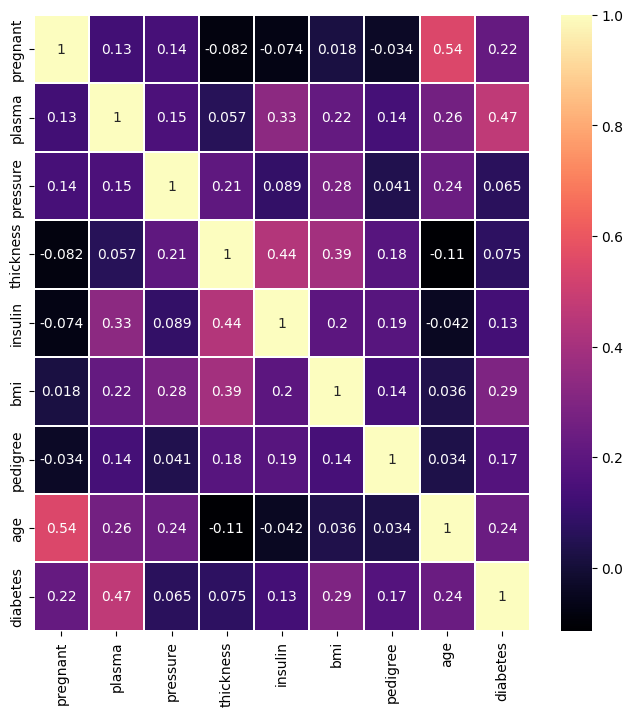

In [34]:
#  상관관계를 그래프로 표현 ->  heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), linewidths=0.1, linecolor='white', annot=True, cmap='magma')
plt.show()

In [ ]:
import matplotlib

matplotlib.colormaps()   # cmaps의 정보 출력

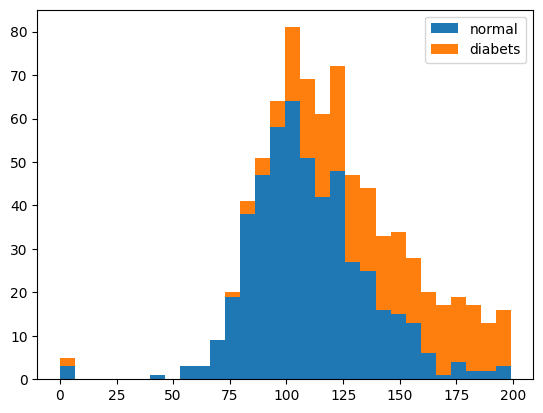

In [37]:
# plasma 속성에 대한 막대그래프 작성
X = [df.plasma[ df.diabetes == 0], df.plasma[ df.diabetes == 1] ]
plt.hist(x=X, bins=30, histtype='barstacked', label=['normal', 'diabets'])
plt.legend()
plt.show()

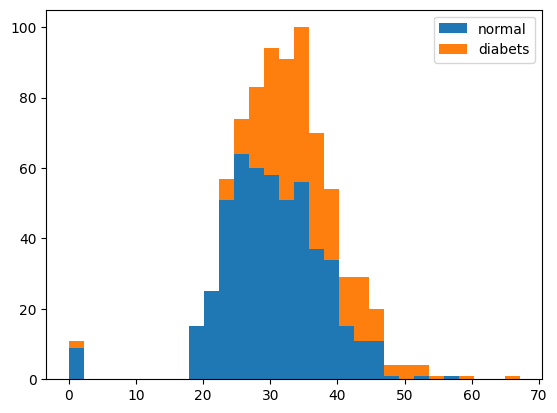

In [38]:
# bmi 속성에 대한 막대그래프 작성
X = [df.bmi[ df.diabetes == 0], df.bmi[ df.diabetes == 1] ]
plt.hist(x=X, bins=30, histtype='barstacked', label=['normal', 'diabets'])
plt.legend()
plt.show()

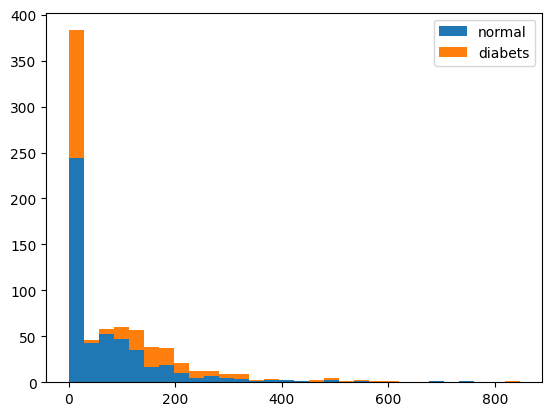

In [39]:
# insulin 속성에 대한 막대그래프 작성
X = [df.insulin[ df.diabetes == 0], df.insulin[ df.diabetes == 1] ]
plt.hist(x=X, bins=30, histtype='barstacked', label=['normal', 'diabets'])
plt.legend()
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]

#  딥러닝 모델을 생성하고, 모델을 실행
model = Sequential()
# 첫번째 layer node 수 -> 20, 활성함수  relu
model.add(Dense(20, input_dim=8, activation='relu'))
# 두번째 layer node 수 -> 10, 활성함수  relu
model.add(Dense(10, activation='relu'))
# 출력층 추가
model.add(Dense(1, activation='sigmoid'))
# 모델의 구조 확인  -> model.summary()
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=500)

TypeError: 'numpy.ndarray' object is not callable

In [11]:
x_features = ['plasma', 'insulin', 'bmi', 'age']
X1 = df.loc[ : , x_features]


In [12]:
# 옵티마이저, 실행 횟수, 손실함수를 임의로 설정해서 모델을 실행
model1 = Sequential()
model1.add(Dense(20, input_dim=4, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.fit(X1, y, epochs=500)

Epoch 1/500
24/24 [==============================] - 1s 1ms/step - loss: 2.0057 - accuracy: 0.4870
Epoch 2/500
24/24 [==============================] - 0s 1ms/step - loss: 1.3019 - accuracy: 0.5065
Epoch 3/500
24/24 [==============================] - 0s 1ms/step - loss: 1.1265 - accuracy: 0.4909
Epoch 4/500
24/24 [==============================] - 0s 1ms/step - loss: 1.0047 - accuracy: 0.5312
Epoch 5/500
24/24 [==============================] - 0s 1ms/step - loss: 0.8945 - accuracy: 0.5456
Epoch 6/500
24/24 [==============================] - 0s 1ms/step - loss: 0.8508 - accuracy: 0.5391
Epoch 7/500
24/24 [==============================] - 0s 1ms/step - loss: 0.7893 - accuracy: 0.5664
Epoch 8/500
24/24 [==============================] - 0s 1ms/step - loss: 0.7461 - accuracy: 0.5781
Epoch 9/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6964 - accuracy: 0.6328
Epoch 10/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.6237
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.5560 - accuracy: 0.7266
Epoch 84/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5490 - accuracy: 0.7305
Epoch 85/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5908 - accuracy: 0.6992
Epoch 86/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5552 - accuracy: 0.7292
Epoch 87/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5469 - accuracy: 0.7370
Epoch 88/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5699 - accuracy: 0.7240
Epoch 89/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5624 - accuracy: 0.7135
Epoch 90/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5684 - accuracy: 0.7031
Epoch 91/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5402 - accuracy: 0.7409
Epoch 92/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5435 - accuracy: 0.7344
Epoch 93/500


24/24 [==============================] - 0s 1ms/step - loss: 0.4900 - accuracy: 0.7695
Epoch 246/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4882 - accuracy: 0.7630
Epoch 247/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5295 - accuracy: 0.7500
Epoch 248/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5344 - accuracy: 0.7422
Epoch 249/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4859 - accuracy: 0.7734
Epoch 250/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4883 - accuracy: 0.7669
Epoch 251/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4916 - accuracy: 0.7734
Epoch 252/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4814 - accuracy: 0.7695
Epoch 253/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5156 - accuracy: 0.7630
Epoch 254/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4881 - accuracy: 0.7799
Epoc

24/24 [==============================] - 0s 1ms/step - loss: 0.4830 - accuracy: 0.7669
Epoch 408/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4746 - accuracy: 0.7695
Epoch 409/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4825 - accuracy: 0.7487
Epoch 410/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4737 - accuracy: 0.7773
Epoch 411/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4868 - accuracy: 0.7643
Epoch 412/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4904 - accuracy: 0.7578
Epoch 413/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4881 - accuracy: 0.7422
Epoch 414/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4819 - accuracy: 0.7865
Epoch 415/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5693 - accuracy: 0.7279
Epoch 416/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4808 - accuracy: 0.7630
Epoc

In [13]:
# 유방암 자료를 가지고 딥러닝 학습
from sklearn.datasets import load_breast_cancer

Data = load_breast_cancer()   # X <- data,  y <- target (  층은 3개층 )

In [64]:
Data[ 'feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
X = Data['data']
y = Data['target']

In [22]:
X.shape[1]

30

In [ ]:
model = Sequential()
model.add(Dense(50, input_dim=X.shape[1], activation='relu'))
model.add(Dense(50,  activation='relu'))
model.add(Dense(30,  activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, epochs=2000, verbose=False, batch_size=100)

In [29]:
print(history.history['loss'][-1], history.history['accuracy'][-1])

0.06846456229686737 0.9701230525970459


In [ ]:
import matplotlib.pyplot as plt

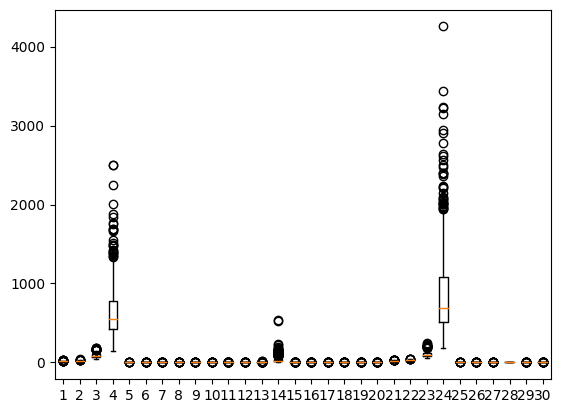

In [43]:
plt.boxplot(X)
plt.show()

In [39]:
x1 = X[:,[3,13,23]]

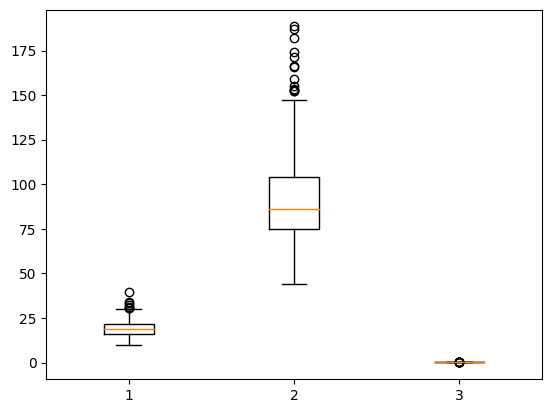

In [42]:
# plt.figure(figsize=(20,10))
plt.boxplot(X[:,[1,2,5]])
plt.show()

In [30]:
# X <- 3, 13, 23 의 자료 확인
x_names = Data[ 'feature_names'][[3,13,23]]
x_names

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [20]:
np.unique(y)  # binary_crossentropy

array([0, 1])